In [1]:
import pandas as pd
url = "https://www.w3schools.com/python/pandas/data.csv"
df_calaries= pd.read_csv(url, delimiter=',', header='infer')
df_calaries.Calories = df_calaries.Calories.fillna(df_calaries.Calories.mean())
goodTraining = pd.Series(df_calaries.Pulse > 100)
df_calaries = pd.concat([df_calaries, goodTraining.rename('Healthy')], axis=1)


df_calaries


,Duration,Pulse,Maxpulse,Calories,Healthy
0,60,110,130,409.1,True
1,60,117,145,479.0,True
2,60,103,135,340.0,True
3,45,109,175,282.4,True
4,45,117,148,406.0,True
...,...,...,...,...,...
164,60,105,140,290.8,True
165,60,110,145,300.0,True
166,60,115,145,310.2,True
167,75,120,150,320.4,True


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13936\1129889081.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_calaries.Duration, rotation= 90)


<bound method Figure.show of <Figure size 1000x400 with 2 Axes>>

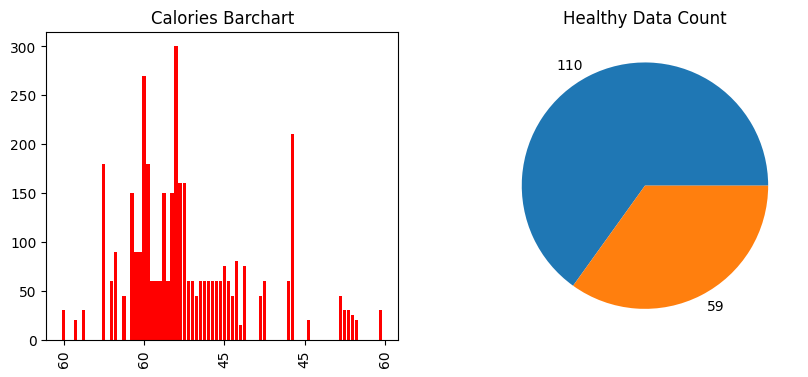

In [ ]:


fig , ax= plt.subplots(1, 2, figsize=(10, 4))
ax[0].bar(x= df_calaries.Pulse, height=df_calaries.Duration, color= "red")
ax[0].set_title("Calories Barchart")

ax[0].set_xticklabels(df_calaries.Duration, rotation= 90)

health_count = df_calaries.Healthy.value_counts()

ax[1].pie(health_count, labels=health_count)
ax[1].set_title('Healthy Data Count')


fig.show

<function matplotlib.figure.Figure.show(self, warn=True)>

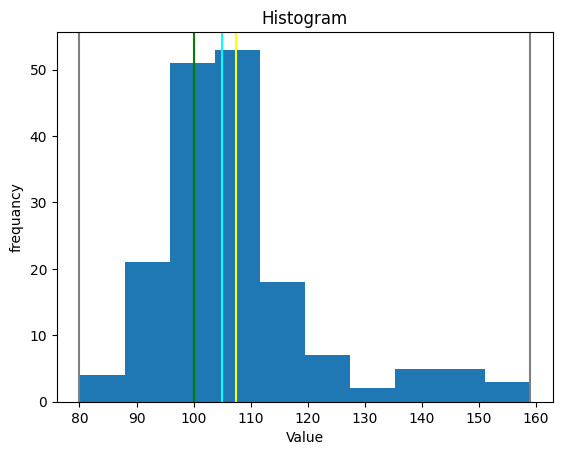

In [3]:
fig = plt.Figure
plt.hist(df_calaries.Pulse)
max_val = df_calaries.Pulse.max()
min_val = df_calaries.Pulse.min()
mean_val = df_calaries.Pulse.mean()
med_val = df_calaries.Pulse.median()
mode_val = df_calaries.Pulse.mode()[0]
plt.title("Histogram")
plt.xlabel('Value')
plt.ylabel('frequancy')
plt.axvline(x= max_val, color= 'grey')
plt.axvline(x= min_val, color= 'grey')
plt.axvline(x= mean_val, color= 'yellow')
plt.axvline(x= med_val, color= 'cyan')
plt.axvline(x= mode_val, color= 'green')
fig.show

<bound method Figure.show of <Figure size 1000x400 with 0 Axes>>

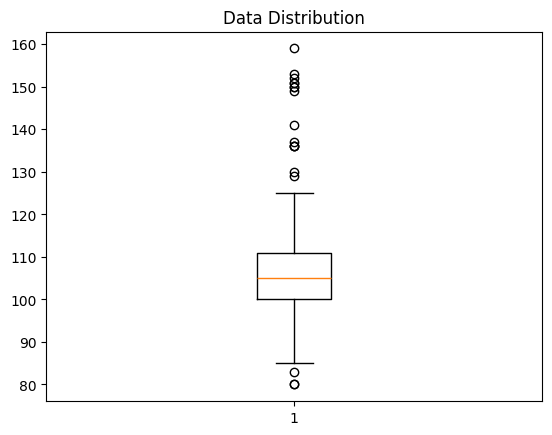

In [4]:
pulse = df_calaries.Pulse

fig = plt.Figure(figsize=(10,4))
plt.boxplot(pulse)
plt.title("Data Distribution")
fig.show

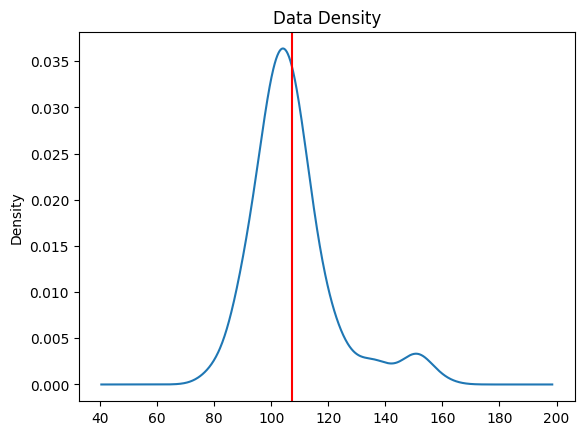

In [5]:

 
def show_density(data): 
    fig = plt.Figure(figsize=(10, 4))
    data.plot.density()
    plt.title('Data Density')
    plt.show
    plt.axvline(x=  df_calaries.Pulse.mean(), color= "red")
    

show_density(df_calaries.Pulse)


In [6]:

import math
mean = df_calaries.Pulse.mean()
veriance = 0
for pul in df_calaries.Pulse:
    veriance = veriance + ((mean - pul)**2)

veriance = veriance/ df_calaries.shape[0]

std = math.sqrt(veriance)
std

for col_name in ['Calories', 'Pulse']: 
    col = df_calaries[col_name]
    col_range =col.max()- col.min()
    col_var = col.var()
    col_std= col.std()
    print(f'colunm= {col_name}\n range={col_range} \n variance={col_var} \n std= {col_std}\n\n')

colunm= Calories
 range=1810.1000000000001 
 variance=68846.40835946574 
 std= 262.38599116466895


colunm= Pulse
 range=79 
 variance=210.547619047619 
 std= 14.510259096501999




In [7]:
df_calaries.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [13]:
df_sample = df_calaries[df_calaries.Duration>80]
df_sample.shape

(24, 5)

<Axes: title={'center': 'Calories'}, xlabel='Healthy'>

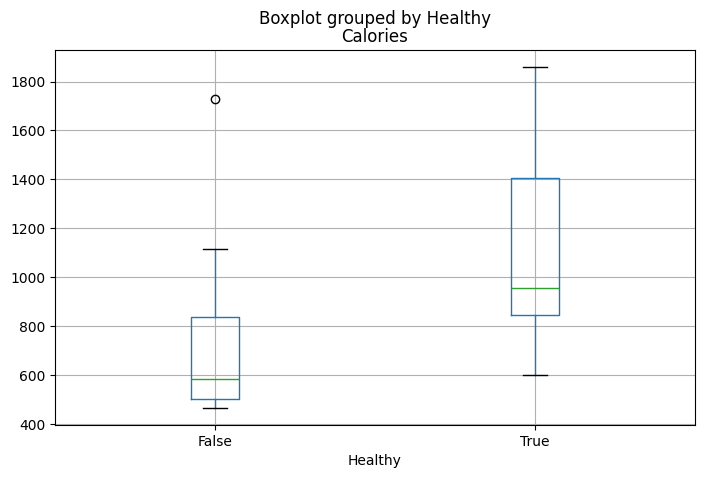

In [14]:
df_sample.boxplot(column= "Calories", by="Healthy", figsize=(8,5))

<Axes: xlabel='Healthy'>

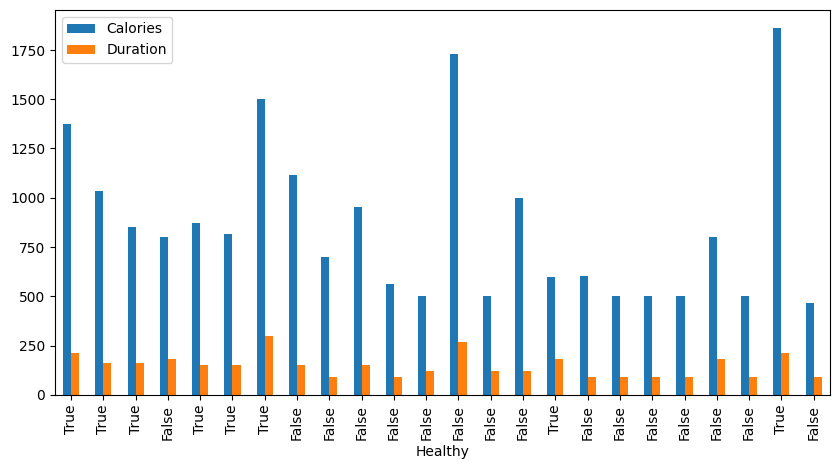

In [15]:
df_sample.plot(x='Healthy', y=["Calories", "Duration"], kind='bar', figsize=(10, 5))

<Axes: xlabel='Healthy'>

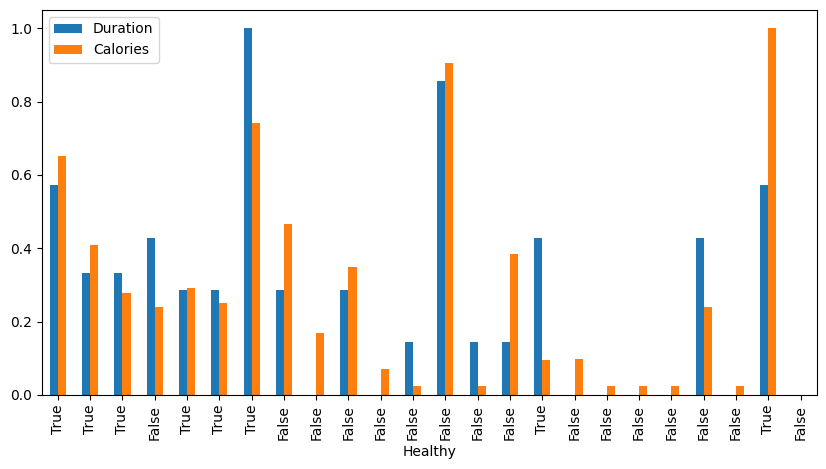

In [16]:
from sklearn.preprocessing import MinMaxScaler
scalor = MinMaxScaler()
df_normalized = df_sample[['Duration', 'Calories', 'Healthy']].copy()
df_normalized[['Duration', 'Calories']] = scalor.fit_transform(df_normalized[['Duration', 'Calories']])

df_normalized.plot(x='Healthy', y=['Duration', 'Calories'], kind= 'bar', figsize=(10,5))

In [17]:
df_normalized

,Duration,Calories,Healthy
60,0.571429,0.652511,True
61,0.333333,0.407461,True
62,0.333333,0.277331,True
65,0.428571,0.239598,False
66,0.285714,0.291966,True
67,0.285714,0.250789,True
69,1.000000,0.741607,True
70,0.285714,0.465280,False
72,0.000000,0.167575,False
73,0.285714,0.349211,False


In [21]:
df_normalized.Calories.corr(df_normalized.Duration)

np.float64(0.8343889923468918)

<Axes: title={'center': 'Relationship between Duration and Calories'}, xlabel='Duration', ylabel='Calories'>

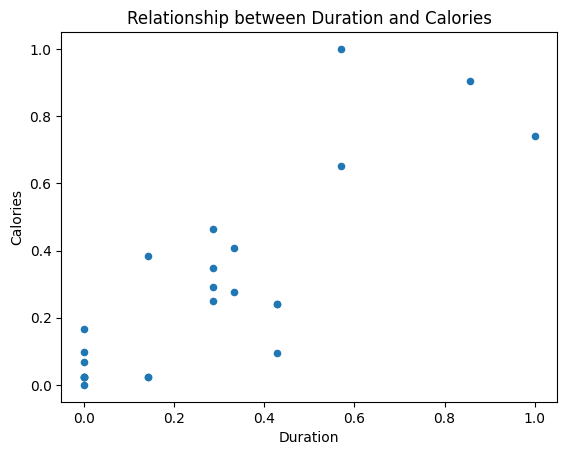

In [24]:
df_normalized.plot.scatter(title= 'Relationship between Duration and Calories', x='Duration', y="Calories")

The slop is 5.769545527114042
 The intersept is 11.658512053643108


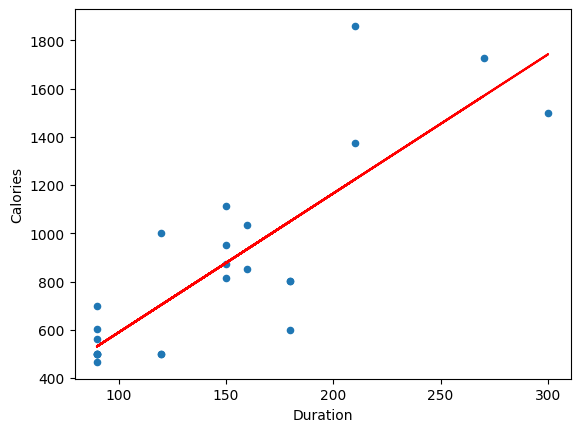

In [36]:
from scipy import stats
import matplotlib 
import matplotlib.pyplot as plt
df_regression  = df_sample[['Calories', 'Duration']].copy()

m, b, r, p, se = stats.linregress(df_regression['Duration'], df_regression['Calories'])

df_regression['f(x)'] = (m * df_regression['Duration']) + b
df_regression['error'] = df_regression['f(x)'] - df_regression['Calories']

df_regression.plot.scatter(x= 'Duration',  y= 'Calories')
plt.plot(df_regression['Duration'], df_regression['f(x)'], color= 'red')
plt.show


print(f'The slop is {m}\n The intersept is {b}')

In [ ]:
def preduction(x): 
    return m*x  + b

preduction(45)

271.31